In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [4]:
detime = pd.read_csv("D:\ExcelR\Linear Regression\delivery_time.csv")
detime
detime.tail(10)

,Delivery Time,Sorting Time
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
detime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
type(detime)
detime.shape

(21, 2)

In [10]:
detime.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [12]:
detime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [14]:
detime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
detime2=detime.iloc[:,1:]

In [18]:
detime2

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [20]:
data=detime2.copy()

In [22]:
data['Sorting Time']=pd.to_numeric(data['Sorting Time'],errors='coerce')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sorting Time  21 non-null     int64
dtypes: int64(1)
memory usage: 296.0 bytes


In [25]:
#Count of duplicated rows
data[data.duplicated()].shape

(12, 1)

In [27]:
data

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [29]:
#Print the duplicated rows
data[data.duplicated()]

,Sorting Time
4,10
5,6
8,10
9,9
11,4
12,7
13,3
14,3
15,4
16,6


In [31]:
data_cleaned1=data.drop_duplicates()

In [33]:
data_cleaned1.shape

(9, 1)

In [35]:
#data_cleaned2=data_cleaned1.drop('Sorting Time',axis=1)

In [43]:
#data_cleaned2

In [45]:
data_cleaned1

,Sorting Time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


In [51]:
#rename the Solar column
data_cleaned3 = data_cleaned1.rename({'Sorting Time': 'Sorting_Time'}, axis=1)

In [52]:
data_cleaned3

,Sorting_Time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


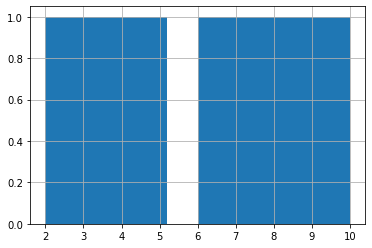

In [54]:
# histogram of Ozone
data_cleaned3['Sorting_Time'].hist()

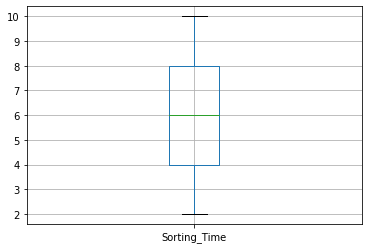

In [56]:
#Box plot
data_cleaned3.boxplot(column=['Sorting_Time'])

In [58]:
#Descriptive stat
data_cleaned3['Sorting_Time'].describe()

count     9.000000
mean      6.000000
std       2.738613
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_Time, dtype: float64

In [60]:
data_cleaned3

,Sorting_Time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


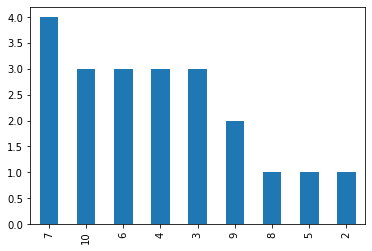

In [63]:
#Bar plot
data['Sorting Time'].value_counts().plot.bar()

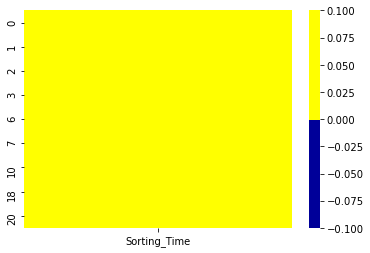

In [65]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [67]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Sorting_Time


In [69]:
data_cleaned3.isnull().sum()

Sorting_Time    0
dtype: int64

In [72]:
#Mean Imputation
mean = data_cleaned3['Sorting_Time'].mean()
print(mean)

6.0


In [74]:
data_cleaned3['Sorting_Time'] = data_cleaned3['Sorting_Time'].fillna(mean)

In [76]:
data_cleaned3

,Sorting_Time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


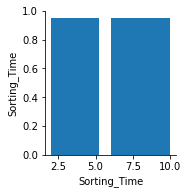

In [78]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)

In [80]:
#Correlation
data_cleaned3.corr()

,Sorting_Time
Sorting_Time,1.0


In [83]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Sorting Time'])

In [85]:
data_cleaned4

,Sorting Time_2,Sorting Time_3,Sorting Time_4,Sorting Time_5,Sorting Time_6,Sorting Time_7,Sorting Time_8,Sorting Time_9,Sorting Time_10
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0


In [87]:
data_cleaned4=data_cleaned4.dropna()

In [89]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [91]:
data_cleaned4.values

array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

In [93]:
array = data_cleaned3.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.  ]
 [0.25]
 [0.5 ]
 [0.88]
 [0.62]]


In [95]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [97]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.22 -0.41 -0.41 -0.22 -0.41 -0.49 -0.22 -0.32  2.45]
 [-0.22 -0.41  2.45 -0.22 -0.41 -0.49 -0.22 -0.32 -0.41]
 [-0.22 -0.41 -0.41 -0.22  2.45 -0.49 -0.22 -0.32 -0.41]
 [-0.22 -0.41 -0.41 -0.22 -0.41 -0.49 -0.22  3.08 -0.41]
 [-0.22 -0.41 -0.41 -0.22 -0.41 -0.49 -0.22 -0.32  2.45]]


In [98]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Sorting Time.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sorting Time.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
